## K-means( random initialization)

In [5]:
import numpy as np
import math

# % Standard K-means clustering
# % Inputs: data, n*d data matrix with n instances and d features
# %         K, number of clusters
# % Ouputs: labels, n*1 indicator matrix with elements from 1 to K
# %         centroids, K*d centroid matrix
# %         objV, objective function value of K-means
# % Jie TANG by 04/20/2020 jietang@brandeis.edu

def myKmeans(data, K, Maxiter=50, ObjV =math.inf, threshold = 0.01):
    centroids = initializeCentroid(data, K)
    for i in range(Maxiter):
        labels, New_ObjV = assign_label(data, centroids)
        centroids = update_centroid(data, K, labels)
        if ObjV-New_ObjV > threshold:
            ObjV = New_ObjV
    return labels, centroids, ObjV

## initialize k centroids randomly
def initializeCentroid(data, K):
    return data[np.random.choice(len(data), K, replace=False)]
   
## assign labels to each point
def assign_label(data, centroids):
     return np.array([np.argmin(np.sqrt(np.sum((data[i]-centroids)**2, axis=1))) for i in range(len(data))]),\
    np.sum([np.sum((data[i]-centroids)**2) for i in range(len(data))])

## update the centroids
def update_centroid(data, K, labels):
    return np.array([np.mean(data[labels==k], axis=0) for k in range(K)])

### Testing

In [15]:
## importing packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

## loading data
three_globs = pd.read_csv('/Users/tjmask/Desktop/Semester2/DataMining/HW1/hw1/Homework_1/Datasets/three_globs.csv')
three_globs = np.array(three_globs)

In [16]:
labels, centroids, ObjV = myKmeans(three_globs, 3)

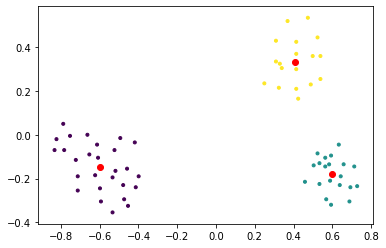

In [17]:
plt.scatter(three_globs[:, 0], three_globs[:, 1], marker='.', c = labels)
plt.scatter(centroids[:, 0], centroids[:,1], c='r')
plt.show()

## K-means++

In [28]:
import numpy as np

## K-means++ initialization 
def myKmeans_pp(data, K):
    ## get the data shape and creat an empty centriod array
    d = data.shape[1] 
    centroids = np.zeros(d*K).reshape(K,d)
    index = np.zeros(K)
    
    ## randomly choose the first centroid  
    index[0] = np.random.choice(len(data),1, replace=False)
    initial_centroid = data[int(index[0])]
    centroids[0] = initial_centroid
    
    ## choose next centroids till all centroids are chosen
    for k in range(1, K):
        ## calculating the distance 
        distance = np.array([(np.sqrt(np.sum((data[i]-centroids)**2, axis=1))) for i in range(len(data))])
        
        ## get the index of the point which has the max distance 
        index[k] = np.argmax(distance)
        
        ## update centroids
        centroids[k] = data[int(index[k])]
    
    return centroids, index

### Testing

In [29]:
myKmeans_pp(three_globs, 3)

(array([[0.42394, 0.16459],
        [0.47382, 0.53367],
        [0.36908, 0.5187 ]]), array([44., 27., 28.]))

## Greedy K-means ???

In [ ]:
from sklearn.cluster import KMeans

def Greedy_Kmeans(data, K):
    ## get the data shape and create an empty centriod array
    d = data.shape[1] 
    centroids = np.zeros(d*K).reshape(K,d)
    index = np.zeros(K)
    
    ## choose the mean of all points as the initialized centroid
    initial_centriod = np.sum(data, axis=0)
    
   
    for k in range(1, K):
        centroid_k = np.zeros(d)
        temp_socre = np.zeros(len(data))
        temp_centroid = np.zeros(d*k).reshape(k,d)
        for i in range(len(data)):
            temp_socre[i] = KMeans(data, k, centroid_k).score
            temp_centroid[i] = KMeans.centroid
        
        centroid_k = temp_centroid[np.argmax(temp_socre)]
        
    return centroids, index 

## Kernel K-means

In [272]:
from sklearn.cluster import KMeans
from utils import * 
from math import exp, inf


def myKernalKmeans(data, K, sigma):
    
# % Standard K-means clustering
# % Inputs: data, n*d data matrix with n instances and d features;
#           K, number of clusters; 
#           sigma, the variance we want the kernel to have;      
# % Ouputs: labels, n*1 indicator matrix with elements from 1 to K
# %         objV, objective function value of K-means
# % Jie Tang 04/20/2020 jietang@brandeis.edu

    maxIter = 100;
    threshold = 0.04;
    old_ObjV = inf;
    n = len(data)
    labels = np.zeros([n])
    for i in range(n):
        labels[i] = np.random.choice(K, 1, replace = True)
        
    ## generate the Kernel matrix 
    Kmatrix = kernel(data, sigma)
    
    for i in range(maxIter):
        labels, ObjV = assignLabel(data, labels,Kmatrix, n, K) ## update labels
        
        if old_ObjV-ObjV > threshold:
            old_ObjV = ObjV
    return labels, ObjV



def assignLabel(data, labels, Kmatrix, n, K):
    ObjV = 0
    distance = np.zeros([n, K]) 
    
    for i in range(n):
        for k in range(K):
            ## computing distance based on objective functions
            distance[i,k] = -2*np.sum(Kmatrix[i,np.where(labels==k)[0]])/np.sum(labels==k) +\
            np.sum(Kmatrix[np.where(labels==k)[0],np.where(labels==k)[0]])/(np.sum(labels==k)^2)
            
        value = np.min(distance[i,:])
        ObjV += value
        labels[i] = np.argmin(distance[i,:])
        
    return labels, ObjV


def squaredDistance(a, b):
    return np.linalg.norm(a-b)

def kernel(data,sigma):
    """" 
    Inputs: data, n*d data matrix with n instances and d features
            K, number of clusters; 
            sigma, the variance we want the kernel to have;
    Ouputs: Kmatrix, n*n Kernel matrix 

    """""
    nData = len(data)
    Kmatrix = np.zeros([nData,nData]) # nData x nData matrix
    
    # Calculate the Kmatrix matrix
    # symmetric matrix
    for i in range(nData):
        for j in range(i,nData):
            if i != j:  # diagonal element of matrix = 0
                # kernel: K(xi,xj) = e ( (-|xi-xj|**2) / (2sigma**2)
                square_dist = squaredDistance(data[i],data[j])
                base = 2.0 * sigma**2
                Kmatrix[i][j] = exp(-square_dist/base)
                Kmatrix[j][i] = Kmatrix[i][j]
                
    return Kmatrix

### Testing

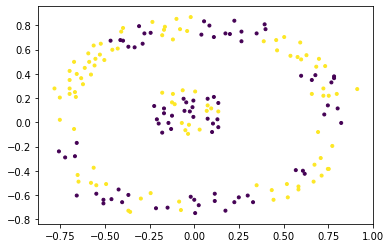

In [278]:
## loading data 
eye  = pd.read_csv('/Users/tjmask/Desktop/Semester2/DataMining/HW1/hw1/Homework_1/Datasets/eye.csv')
eye = np.array(eye.iloc[:,1:])

labels, ObjV = myKernalKmeans(eye, 2, 0.04)
plt.scatter(eye[:, 0], eye[:, 1], marker='.', c = labels)
plt.show()